In [14]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install nltk
%pip install Sastrawi
%pip install wordcloud
%pip install matplotlib

You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


# Data PreProcessing

In [15]:
import pandas as pd

# df = pd.read_csv('sample_data/the_data_selected.csv', sep=';', encoding='ISO-8859-1')
df = pd.read_csv('sample_data/the_data_selected.csv', sep=',')
my_df = df[['score', 'content']]
my_df.head()

,score,content
0,5,Konsep taman safari dipinggir pantai jadi bisa...
1,3,Cukup bersih dan banyak daya tarik. Sayang sek...
2,5,NaN
3,1,"Dophinnya bagus, cuman sayang fasilitas tidak ..."
4,4,Senang bisa berkunjung ke safari beach batang....


### Menghitung Jumlah Baris

In [16]:
len(my_df.index)

1700

### Menghapus Baris yang Null

In [17]:
my_df = my_df.dropna(subset=['content'])
my_df.isnull().sum()

score      0
content    0
dtype: int64

### Menghitung Jumlah Baris setelah Null Dihilangkan

In [18]:
len(my_df)

969

## a. Casefolding

Proses casefolding adalah proses mengubah seluruh huruf menjadi kecil.

In [19]:
import re
def clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    my_df[new_text_field_name] = my_df[new_text_field_name].str.replace(r"\d+", "")
    return my_df

In [20]:
my_df['text_clean'] = my_df['content'].str.lower()

In [21]:
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head()

,score,content,text_clean
0,5,Konsep taman safari dipinggir pantai jadi bisa...,konsep taman safari dipinggir pantai jadi bisa...
1,3,Cukup bersih dan banyak daya tarik. Sayang sek...,cukup bersih dan banyak daya tarik sayang seka...
3,1,"Dophinnya bagus, cuman sayang fasilitas tidak ...",dophinnya bagus cuman sayang fasilitas tidak s...
4,4,Senang bisa berkunjung ke safari beach batang....,senang bisa berkunjung ke safari beach batang ...
5,5,Tempat masih harus dibenahi,tempat masih harus dibenahi


## b. Filtering

Filtering Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Stopword biasanya dihilangkan dalam proses pengolahan teks. contoh dalam bahasa Indonesia seperti "dan", "atau", "yang", "di", "dari", "ke", "dengan", "jika", "ketika", "saat", "atau", "tetapi", "karena", "sehingga", "sebelum", "setelah", "agar", "supaya", "serta", "itulah", "yaitu", "misalnya", "contoh", "adalah", "yakni", "dst". Stopword mempunya informasi rencahan yang kecil, sehingga tidak berpengaruh dalam proses klasifikasi.

In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('indonesian')
data_clean['text_Stopword'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,score,content,text_clean,text_Stopword
0,5,Konsep taman safari dipinggir pantai jadi bisa...,konsep taman safari dipinggir pantai jadi bisa...,konsep taman safari dipinggir pantai 2 pilihan...
1,3,Cukup bersih dan banyak daya tarik. Sayang sek...,cukup bersih dan banyak daya tarik sayang seka...,bersih daya tarik sayang harga makanannya maha...
3,1,"Dophinnya bagus, cuman sayang fasilitas tidak ...",dophinnya bagus cuman sayang fasilitas tidak s...,dophinnya bagus cuman sayang fasilitas sebandi...
4,4,Senang bisa berkunjung ke safari beach batang....,senang bisa berkunjung ke safari beach batang ...,senang berkunjung safari beach batang kmrn pas...
5,5,Tempat masih harus dibenahi,tempat masih harus dibenahi,dibenahi


## c. Tokenizing

Tokenizing merupakan proses pemisahan text menjadi potongan-potongan yang lebih kecil. Tokenizing dapat dilakukan dengan menggunakan library NLTK.

In [23]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize, sent_tokenize
data_clean['text_tokens'] = data_clean['text_Stopword'].apply(lambda x: word_tokenize(x))
data_clean.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,score,content,text_clean,text_Stopword,text_tokens
0,5,Konsep taman safari dipinggir pantai jadi bisa...,konsep taman safari dipinggir pantai jadi bisa...,konsep taman safari dipinggir pantai 2 pilihan...,"[konsep, taman, safari, dipinggir, pantai, 2, ..."
1,3,Cukup bersih dan banyak daya tarik. Sayang sek...,cukup bersih dan banyak daya tarik sayang seka...,bersih daya tarik sayang harga makanannya maha...,"[bersih, daya, tarik, sayang, harga, makananny..."
3,1,"Dophinnya bagus, cuman sayang fasilitas tidak ...",dophinnya bagus cuman sayang fasilitas tidak s...,dophinnya bagus cuman sayang fasilitas sebandi...,"[dophinnya, bagus, cuman, sayang, fasilitas, s..."
4,4,Senang bisa berkunjung ke safari beach batang....,senang bisa berkunjung ke safari beach batang ...,senang berkunjung safari beach batang kmrn pas...,"[senang, berkunjung, safari, beach, batang, km..."
5,5,Tempat masih harus dibenahi,tempat masih harus dibenahi,dibenahi,[dibenahi]


## d. Stemming

Stemming adalah proses pemetaan dan penguraian bentuk dari kata ke bentuk dasarnya. Stemming dilakukan dengan menghilangkan imbuhan-imbuhan yang terdapat pada kata. Contoh stemming adalah mengubah kata "membaca" menjadi "baca".

In [24]:
%pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [25]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [26]:
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung = 0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung += 1
    print(hitung, ":", term, ":", term_dict[term])

print(term_dict)
print("------------------------")

# Apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_clean['text_tokens_stemmed'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)


2873
------------------------
1 : konsep : konsep
2 : taman : taman
3 : safari : safari
4 : dipinggir : pinggir
5 : pantai : pantai
6 : 2 : 2
7 : pilihan : pilih
8 : masuk : masuk
9 : kepantai : pantai
10 : liat : liat
11 : kebun : kebun
12 : binatangnya : binatang
13 : dipertimbangkan : timbang
14 : tujuan : tuju
15 : kesini : kesini
16 : tiket : tiket
17 : beda : beda
18 : yakalo : yakalo
19 : pengen : ken
20 : liat2 : liat2
21 : bersih : bersih
22 : daya : daya
23 : tarik : tarik
24 : sayang : sayang
25 : harga : harga
26 : makanannya : makan
27 : mahal : mahal
28 : memiliki : milik
29 : kebijakan : bijak
30 : makanan : makan
31 : minuman : minum
32 : dophinnya : dophinnya
33 : bagus : bagus
34 : cuman : cuman
35 : fasilitas : fasilitas
36 : sebanding : banding
37 : tiketnya : tiket
38 : kena : kena
39 : retribusi : retribusi
40 : area : area
41 : wisata : wisata
42 : resto : resto
43 : 1 : 1
44 : tertata : tata
45 : sistem : sistem
46 : pembeliannya : beli
47 : cepat : cepat
48 : k

,score,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed
0,5,Konsep taman safari dipinggir pantai jadi bisa...,konsep taman safari dipinggir pantai jadi bisa...,konsep taman safari dipinggir pantai 2 pilihan...,"[konsep, taman, safari, dipinggir, pantai, 2, ...",konsep taman safari pinggir pantai 2 pilih mas...
1,3,Cukup bersih dan banyak daya tarik. Sayang sek...,cukup bersih dan banyak daya tarik sayang seka...,bersih daya tarik sayang harga makanannya maha...,"[bersih, daya, tarik, sayang, harga, makananny...",bersih daya tarik sayang harga makan mahal mil...
3,1,"Dophinnya bagus, cuman sayang fasilitas tidak ...",dophinnya bagus cuman sayang fasilitas tidak s...,dophinnya bagus cuman sayang fasilitas sebandi...,"[dophinnya, bagus, cuman, sayang, fasilitas, s...",dophinnya bagus cuman sayang fasilitas banding...
4,4,Senang bisa berkunjung ke safari beach batang....,senang bisa berkunjung ke safari beach batang ...,senang berkunjung safari beach batang kmrn pas...,"[senang, berkunjung, safari, beach, batang, km...",senang kunjung safari beach batang kmrn pas pa...
5,5,Tempat masih harus dibenahi,tempat masih harus dibenahi,dibenahi,[dibenahi],benah
6,1,"Jelek, becek , g jls",jelek becek g jls,jelek becek g jls,"[jelek, becek, g, jls]",jelek becek g jls
7,2,Rincian tiket Masuk wekkend\r\n#Tiket masuk pa...,rincian tiket masuk wekkendtiket masuk pantai ...,rincian tiket masuk wekkendtiket masuk pantai ...,"[rincian, tiket, masuk, wekkendtiket, masuk, p...",rincian tiket masuk wekkendtiket masuk pantai ...
8,4,"Nonton lumba"",gajah atraksi... menghibur anak""...",nonton lumbagajah atraksi menghibur anak sebag...,nonton lumbagajah atraksi menghibur anak prose...,"[nonton, lumbagajah, atraksi, menghibur, anak,...",nonton lumbagajah atraksi hibur anak proses ba...
9,4,Sebetulnya sudah bagus tolong tempat kandang d...,sebetulnya sudah bagus tolong tempat kandang d...,bagus tolong kandang aquarium hewan2nya dirawat,"[bagus, tolong, kandang, aquarium, hewan2nya, ...",bagus tolong kandang aquarium hewan2nya rawat
10,1,Sangat tidak kids & stroller friendly. Masih b...,sangat tidak kids stroller friendly masih ban...,kids stroller friendly area yg under construct...,"[kids, stroller, friendly, area, yg, under, co...",kids stroller friendly area yg under construct...


In [27]:
data_clean.to_csv('sample_data/the_data_hasiltextpreprocessing.csv', index=False)

# Data Labelling

In [28]:
def pelabelan(skor):
    if skor < 3:
        return 'negatif'
    elif skor == 4:
        return 'positif'
    elif skor == 5:
        return 'positif'
my_df['Label'] = my_df['score'].apply(pelabelan)
my_df = my_df.dropna()

my_df.to_csv('sample_data/the_data_hasillabeling.csv', index=False)

my_df.head()

,score,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label
0,5,Konsep taman safari dipinggir pantai jadi bisa...,konsep taman safari dipinggir pantai jadi bisa...,konsep taman safari dipinggir pantai 2 pilihan...,"[konsep, taman, safari, dipinggir, pantai, 2, ...",konsep taman safari pinggir pantai 2 pilih mas...,positif
3,1,"Dophinnya bagus, cuman sayang fasilitas tidak ...",dophinnya bagus cuman sayang fasilitas tidak s...,dophinnya bagus cuman sayang fasilitas sebandi...,"[dophinnya, bagus, cuman, sayang, fasilitas, s...",dophinnya bagus cuman sayang fasilitas banding...,negatif
4,4,Senang bisa berkunjung ke safari beach batang....,senang bisa berkunjung ke safari beach batang ...,senang berkunjung safari beach batang kmrn pas...,"[senang, berkunjung, safari, beach, batang, km...",senang kunjung safari beach batang kmrn pas pa...,positif
5,5,Tempat masih harus dibenahi,tempat masih harus dibenahi,dibenahi,[dibenahi],benah,positif
6,1,"Jelek, becek , g jls",jelek becek g jls,jelek becek g jls,"[jelek, becek, g, jls]",jelek becek g jls,negatif


### Menampilkan isi Data Hasil Labelling

In [29]:
import pandas as pd
hasillabeling = pd.read_csv('sample_data/the_data_hasillabeling.csv')
pd.set_option('display.max_colwidth', None)
hasillabeling[['content', 'text_clean', 'text_Stopword', 'text_tokens', 'text_tokens_stemmed', 'Label']].head(6)

,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label
0,"Konsep taman safari dipinggir pantai jadi bisa ada 2 pilihan mau masuk kepantai saja atau liat kebun binatangnya, harus dipertimbangkan lagi tujuan anda kesini karena yang tiket taman safari dan hanya liat pantai beda ya,kalo pengen liat2 …",konsep taman safari dipinggir pantai jadi bisa ada 2 pilihan mau masuk kepantai saja atau liat kebun binatangnya harus dipertimbangkan lagi tujuan anda kesini karena yang tiket taman safari dan hanya liat pantai beda yakalo pengen liat2,konsep taman safari dipinggir pantai 2 pilihan masuk kepantai liat kebun binatangnya dipertimbangkan tujuan kesini tiket taman safari liat pantai beda yakalo pengen liat2,"['konsep', 'taman', 'safari', 'dipinggir', 'pantai', '2', 'pilihan', 'masuk', 'kepantai', 'liat', 'kebun', 'binatangnya', 'dipertimbangkan', 'tujuan', 'kesini', 'tiket', 'taman', 'safari', 'liat', 'pantai', 'beda', 'yakalo', 'pengen', 'liat2']",konsep taman safari pinggir pantai 2 pilih masuk pantai liat kebun binatang timbang tuju kesini tiket taman safari liat pantai beda yakalo ken liat2,positif
1,"Dophinnya bagus, cuman sayang fasilitas tidak sebanding dengan harga tiketnya, masih kena retribusi masuk sebelum ke area wisata, resto hanya ada 1 tempat kecil dan tidak tertata sistem pembeliannya (siapa cepat dapat), kasihan yg nunggu duluan yg bawa anak",dophinnya bagus cuman sayang fasilitas tidak sebanding dengan harga tiketnya masih kena retribusi masuk sebelum ke area wisata resto hanya ada 1 tempat kecil dan tidak tertata sistem pembeliannya siapa cepat dapat kasihan yg nunggu duluan yg bawa anak,dophinnya bagus cuman sayang fasilitas sebanding harga tiketnya kena retribusi masuk area wisata resto 1 tertata sistem pembeliannya cepat kasihan yg nunggu duluan yg bawa anak,"['dophinnya', 'bagus', 'cuman', 'sayang', 'fasilitas', 'sebanding', 'harga', 'tiketnya', 'kena', 'retribusi', 'masuk', 'area', 'wisata', 'resto', '1', 'tertata', 'sistem', 'pembeliannya', 'cepat', 'kasihan', 'yg', 'nunggu', 'duluan', 'yg', 'bawa', 'anak']",dophinnya bagus cuman sayang fasilitas banding harga tiket kena retribusi masuk area wisata resto 1 tata sistem beli cepat kasihan yg nunggu duluan yg bawa anak,negatif
2,"Senang bisa berkunjung ke safari beach batang... tapi kmrn pas ke sini pas masih ada pembangunan.. hewannya mgkn belum lengkap. Ada pertunjukan hewan2 juga di jam2 tertentu. Bisa naik gajah, unta. tp yg paling menarik pas atraksi lumba2 …",senang bisa berkunjung ke safari beach batang tapi kmrn pas ke sini pas masih ada pembangunan hewannya mgkn belum lengkap ada pertunjukan hewan2 juga di jam2 tertentu bisa naik gajah unta tp yg paling menarik pas atraksi lumba2,senang berkunjung safari beach batang kmrn pas pas pembangunan hewannya mgkn lengkap pertunjukan hewan2 jam2 gajah unta tp yg menarik pas atraksi lumba2,"['senang', 'berkunjung', 'safari', 'beach', 'batang', 'kmrn', 'pas', 'pas', 'pembangunan', 'hewannya', 'mgkn', 'lengkap', 'pertunjukan', 'hewan2', 'jam2', 'gajah', 'unta', 'tp', 'yg', 'menarik', 'pas', 'atraksi', 'lumba2']",senang kunjung safari beach batang kmrn pas pas bangun hewan mgkn lengkap tunjuk hewan2 jam2 gajah unta tp yg tarik pas atraksi lumba2,positif
3,Tempat masih harus dibenahi,tempat masih harus dibenahi,dibenahi,['dibenahi'],benah,positif
4,"Jelek, becek , g jls",jelek becek g jls,jelek becek g jls,"['jelek', 'becek', 'g', 'jls']",jelek becek g jls,negatif
5,Rincian tiket Masuk wekkend\r\n#Tiket masuk pantai sigandu (5rb/orang) karena lewat jalur dekat pintu tol/alun alun. …,rincian tiket masuk wekkendtiket masuk pantai sigandu 5rborang karena lewat jalur dekat pintu tolalun alun,rincian tiket masuk wekkendtiket masuk pantai sigandu 5rborang jalur pintu tolalun alun,"['rincian', 'tiket', 'masuk', 'wekkendtiket', 'masuk', 'pantai', 'sigandu', '5rborang', 'jalur', 'pintu', 'tolalun', 'alun']",rincian tiket masuk wekkendtiket masuk pantai sigandu 5rborang jalur pintu tolalun alun,negatif


### Jumlah Label Aktual

In [30]:
len(hasillabeling)

891

### Jumlah Label Mentah Positif dan Presentase

In [31]:
positive_count = hasillabeling[hasillabeling['Label'] == 'positif'].shape[0]
print(positive_count)

800


In [32]:
total_count = len(hasillabeling)
positive_percentage = (positive_count / total_count) * 100
print(f"Percentage of positive reviews: {positive_percentage:.2f}%")

Percentage of positive reviews: 89.79%


### Jumlah Label Mentah Negatif dan Presentase

In [33]:
negative_count = hasillabeling[hasillabeling['Label'] == 'negatif'].shape[0]
print(negative_count)

91


In [34]:
negative_count = hasillabeling[hasillabeling['Label'] == 'negatif'].shape[0]
negative_percentage = (negative_count / total_count) * 100
print(f"Percentage of negative reviews: {negative_percentage:.2f}%")

Percentage of negative reviews: 10.21%


# Data Extracting

In [35]:
import pandas as pd

data_clean = pd.read_csv('sample_data/the_data_hasillabeling.csv')
data_clean = pd.DataFrame(data_clean)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']

### Drop Kolom yang Tidak Digunakan

In [36]:
data_clean = data_clean.drop(columns=['score', 'text_clean', 'text_Stopword', 'text_tokens'])

### Setup TFIDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string

A = A.fillna('')

tfid_vectorizer = TfidfVectorizer()

A_fit_tfid = tfid_vectorizer.fit_transform(A)
A_tfid = tfid_vectorizer.transform(A)

### Menampilkan Jumlah Data Hasil Extracting

In [38]:
print(A.shape)
print(A_tfid.shape)
print(A_fit_tfid.shape)

(891,)
(891, 2289)
(891, 2289)


### Konversi Data Hasil Extracting ke Array

In [39]:
A_tfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
print(A_tfid)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8839 stored elements and shape (891, 2289)>
  Coords	Values
  (0, 346)	0.21587106125251418
  (0, 415)	0.1377188408567348
  (0, 1000)	0.16338620591307318
  (0, 1038)	0.23595389836414407
  (0, 1066)	0.16136963738522667
  (0, 1104)	0.20870318643050031
  (0, 1216)	0.37724069863774085
  (0, 1217)	0.27914525489692393
  (0, 1341)	0.13718394189841848
  (0, 1573)	0.2984883217182267
  (0, 1657)	0.20555635004369088
  (0, 1659)	0.18862034931887042
  (0, 1810)	0.2572485183695609
  (0, 2051)	0.3152451369393125
  (0, 2123)	0.12380421424275963
  (0, 2126)	0.26320461029778786
  (0, 2174)	0.22001325376500797
  (0, 2275)	0.27914525489692393
  (1, 180)	0.1232576695583093
  (1, 226)	0.16169488499196857
  (1, 256)	0.09844397110251796
  (1, 290)	0.20858963573450534
  (1, 327)	0.16169488499196857
  (1, 348)	0.18955078084705126
  (1, 515)	0.24769753945022957
  :	:
  (889, 1810)	0.15387365057342534
  (889, 2123)	0.14810741397188945
  (889, 2218)	0.20

# Penerapan Algoritma

## a. Naive Bayes

### 1. Cara Konvensional

In [41]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(A_tfid, B)

MultinomialNB()

In [42]:
B_pred = nb.predict(A_tfid)
data_clean['Label NB'] = B_pred
data_clean = pd.DataFrame(data_clean)
data_clean.to_csv('sample_data/the_data_hasil_sentimen_NB.csv', index=False)

data_clean.head()

,content,text_tokens_stemmed,Label,Label NB
0,"Konsep taman safari dipinggir pantai jadi bisa ada 2 pilihan mau masuk kepantai saja atau liat kebun binatangnya, harus dipertimbangkan lagi tujuan anda kesini karena yang tiket taman safari dan hanya liat pantai beda ya,kalo pengen liat2 …",konsep taman safari pinggir pantai 2 pilih masuk pantai liat kebun binatang timbang tuju kesini tiket taman safari liat pantai beda yakalo ken liat2,positif,positif
1,"Dophinnya bagus, cuman sayang fasilitas tidak sebanding dengan harga tiketnya, masih kena retribusi masuk sebelum ke area wisata, resto hanya ada 1 tempat kecil dan tidak tertata sistem pembeliannya (siapa cepat dapat), kasihan yg nunggu duluan yg bawa anak",dophinnya bagus cuman sayang fasilitas banding harga tiket kena retribusi masuk area wisata resto 1 tata sistem beli cepat kasihan yg nunggu duluan yg bawa anak,negatif,positif
2,"Senang bisa berkunjung ke safari beach batang... tapi kmrn pas ke sini pas masih ada pembangunan.. hewannya mgkn belum lengkap. Ada pertunjukan hewan2 juga di jam2 tertentu. Bisa naik gajah, unta. tp yg paling menarik pas atraksi lumba2 …",senang kunjung safari beach batang kmrn pas pas bangun hewan mgkn lengkap tunjuk hewan2 jam2 gajah unta tp yg tarik pas atraksi lumba2,positif,positif
3,Tempat masih harus dibenahi,benah,positif,positif
4,"Jelek, becek , g jls",jelek becek g jls,negatif,positif


### 2. Cara Pakai 5K-Fold Cross Validation

In [43]:

from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Inisialisasi model MultinomialNB
model = MultinomialNB()

# Setup K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dan prediksi dari setiap fold
fold_accuracies = []
all_predictions = np.zeros_like(B)  # Array untuk menyimpan prediksi dari setiap fold

# Iterasi manual pada setiap fold
for train_index, test_index in kf.split(A_tfid):
    # Bagi data menjadi train dan test berdasarkan fold
    A_train, A_test = A_tfid[train_index], A_tfid[test_index]
    B_train, B_test = B[train_index], B[test_index]

    # Latih model pada data train
    model.fit(A_train, B_train)

    # Prediksi data test
    B_pred = model.predict(A_test)

    # Hitung akurasi untuk fold ini
    accuracy = accuracy_score(B_test, B_pred)
    fold_accuracies.append(accuracy)

    # Simpan prediksi untuk fold ini ke dalam array prediksi keseluruhan
    all_predictions[test_index] = B_pred

# Cetak akurasi per fold
print("Fold Accuracies:", fold_accuracies)
print("Mean Accuracy:", np.mean(fold_accuracies))
print("Standard Deviation of Accuracy:", np.std(fold_accuracies))

# Hitung akurasi total menggunakan rata-rata prediksi
overall_accuracy = accuracy_score(B, all_predictions)
print("Overall Accuracy with Average Predictions:", overall_accuracy)

# Gabungkan hasil rata-rata prediksi dengan dataframe asli
data_clean['Label NB Average'] = all_predictions

# Simpan hasil ke file CSV
data_clean.to_csv('sample_data/the_data_NB_average.csv', index=False)


Fold Accuracies: [0.8938547486033519, 0.898876404494382, 0.8876404494382022, 0.9325842696629213, 0.8764044943820225]
Mean Accuracy: 0.897872073316176
Standard Deviation of Accuracy: 0.01890834327302747
Overall Accuracy with Average Predictions: 0.8978675645342312


## b. Support Vector Machine (SVM)

### 1. Cara Konvensional

In [44]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(A_tfid, B)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(B, svm.predict(A_tfid))))

svm = LinearSVC(C = 1)
svm.fit(A_tfid, B)

Accuracy for C=0.01: 0.8978675645342312
Accuracy for C=0.05: 0.8978675645342312
Accuracy for C=0.25: 0.9259259259259259
Accuracy for C=0.5: 0.9809203142536476
Accuracy for C=0.75: 0.98989898989899
Accuracy for C=1: 0.9932659932659933


LinearSVC(C=1)

In [45]:
B_pred = svm.predict(A_tfid)
data_clean['Label SVM'] = B_pred
data_clean.to_csv('sample_data/the_data_hasil_sentimen_SVM.csv', index=False)
data_clean.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM
0,"Konsep taman safari dipinggir pantai jadi bisa ada 2 pilihan mau masuk kepantai saja atau liat kebun binatangnya, harus dipertimbangkan lagi tujuan anda kesini karena yang tiket taman safari dan hanya liat pantai beda ya,kalo pengen liat2 …",konsep taman safari pinggir pantai 2 pilih masuk pantai liat kebun binatang timbang tuju kesini tiket taman safari liat pantai beda yakalo ken liat2,positif,positif,positif,positif
1,"Dophinnya bagus, cuman sayang fasilitas tidak sebanding dengan harga tiketnya, masih kena retribusi masuk sebelum ke area wisata, resto hanya ada 1 tempat kecil dan tidak tertata sistem pembeliannya (siapa cepat dapat), kasihan yg nunggu duluan yg bawa anak",dophinnya bagus cuman sayang fasilitas banding harga tiket kena retribusi masuk area wisata resto 1 tata sistem beli cepat kasihan yg nunggu duluan yg bawa anak,negatif,positif,positif,negatif
2,"Senang bisa berkunjung ke safari beach batang... tapi kmrn pas ke sini pas masih ada pembangunan.. hewannya mgkn belum lengkap. Ada pertunjukan hewan2 juga di jam2 tertentu. Bisa naik gajah, unta. tp yg paling menarik pas atraksi lumba2 …",senang kunjung safari beach batang kmrn pas pas bangun hewan mgkn lengkap tunjuk hewan2 jam2 gajah unta tp yg tarik pas atraksi lumba2,positif,positif,positif,positif
3,Tempat masih harus dibenahi,benah,positif,positif,positif,positif
4,"Jelek, becek , g jls",jelek becek g jls,negatif,positif,positif,negatif


### 2. Cara Pakai 5K-Fold Cross Validation

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Inisialisasi model Support Vector Machine (SVM)
model = SVC(kernel='linear', random_state=42, C = 1.0)

# Setup K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dan prediksi dari setiap fold
fold_accuracies = []
all_predictions = np.zeros_like(B)  # Array untuk menyimpan prediksi dari setiap fold

# Iterasi manual pada setiap fold
for train_index, test_index in kf.split(A_tfid):
    # Bagi data menjadi train dan test berdasarkan fold
    A_train, A_test = A_tfid[train_index], A_tfid[test_index]
    B_train, B_test = B[train_index], B[test_index]

    # Latih model pada data train
    model.fit(A_train, B_train)

    # Prediksi data test
    B_pred = model.predict(A_test)

    # Hitung akurasi untuk fold ini
    accuracy = accuracy_score(B_test, B_pred)
    fold_accuracies.append(accuracy)

    # Simpan prediksi untuk fold ini ke dalam array prediksi keseluruhan
    all_predictions[test_index] = B_pred

# Cetak akurasi per fold
print("Fold Accuracies:", fold_accuracies)
print("Mean Accuracy:", np.mean(fold_accuracies))
print("Standard Deviation of Accuracy:", np.std(fold_accuracies))

# Hitung akurasi total menggunakan rata-rata prediksi
overall_accuracy = accuracy_score(B, all_predictions)
print("Overall Accuracy with Average Predictions:", overall_accuracy)

# Gabungkan hasil rata-rata prediksi dengan dataframe asli
data_clean['Label SVM Average'] = all_predictions

# Simpan hasil ke file CSV
data_clean.to_csv('sample_data/the_data_SVM_average.csv', index=False)


Fold Accuracies: [0.9106145251396648, 0.9044943820224719, 0.898876404494382, 0.9325842696629213, 0.8707865168539326]
Mean Accuracy: 0.9034712196346744
Standard Deviation of Accuracy: 0.01994515218691262
Overall Accuracy with Average Predictions: 0.9034792368125701


In [47]:
data_clean.to_csv('sample_data/the_data_hasil_NB_dan_SVM.csv', index=False)

## C. Neural Network

In [48]:
import numpy as np

# Convert B to 0 for 'negatif' and 1 for 'positif'
B = B.apply(lambda x: 0 if x == 'negatif' else 1)

# Convert B to a 2-dimensional array
B_array = B.values.reshape(-1, 1)
print(B_array)

[[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]


In [49]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

# Split data menjadi data train dan data test
A_train, A_test, B_train, B_test = train_test_split(A_tfid, B, test_size=0.2, random_state=42)

# Inisialisasi model neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(A_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callback untuk menyimpan model dengan akurasi validasi terbaik
checkpoint = ModelCheckpoint('model.h5', save_best_only=True)

# Latih model
history = model.fit(A_train, B_train,
                    epochs=2000,
                    validation_data=(A_test, B_test),
                    callbacks=[checkpoint])

# Load model terbaik
model.load_weights('model.h5')

# Evaluasi model
loss, accuracy = model.evaluate(A_test, B_test)
print('Accuracy:', accuracy)


c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2000
13/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8632 - loss: 0.6672

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8741 - loss: 0.6471 - val_accuracy: 0.8939 - val_loss: 0.4922
Epoch 2/2000
20/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8941 - loss: 0.4231 

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8951 - loss: 0.4132 - val_accuracy: 0.8939 - val_loss: 0.3128
Epoch 3/2000
21/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8892 - loss: 0.2769 

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8904 - loss: 0.2735 - val_accuracy: 0.8939 - val_loss: 0.2875
Epoch 4/2000
21/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9124 - loss: 0.1812 

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9108 - loss: 0.1836 - val_accuracy: 0.8939 - val_loss: 0.2672
Epoch 5/2000
19/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9153 - loss: 0.1536 

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9121 - loss: 0.1550 - val_accuracy: 0.8939 - val_loss: 0.2542
Epoch 6/2000
21/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9030 - loss: 0.1282 

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9027 - loss: 0.1283 - val_accuracy: 0.8939 - val_loss: 0.2459
Epoch 7/2000
 1/23 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 1.0000 - loss: 0.0247

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9699 - loss: 0.0955 - val_accuracy: 0.8994 - val_loss: 0.2428
Epoch 8/2000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9868 - loss: 0.0820 - val_accuracy: 0.9106 - val_loss: 0.2492
Epoch 9/2000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9932 - loss: 0.0575 - val_accuracy: 0.9050 - val_loss: 0.2536
Epoch 10/2000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9904 - loss: 0.0501 - val_accuracy: 0.8994 - val_loss: 0.2522
Epoch 11/2000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9888 - loss: 0.0396 - val_accuracy: 0.8994 - val_loss: 0.2676
Epoch 12/2000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9921 - loss: 0.0315 - val_accuracy: 0.9050 - val_loss: 0.2646
Epoch 13/2000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9977 - loss: 0.0193 - val_accuracy: 0.9050 - val_loss: 0.2796
Epoch 14/2000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9993 - loss: 0.0160 - val_accuracy: 0.

In [50]:
from sklearn.metrics import accuracy_score

# Predict the labels using the neural network model
B_pred_nn = model.predict(A_tfid)
B_pred_nn = (B_pred_nn > 0.5).astype(int).flatten()

# Measure the accuracy
accuracy_nn = accuracy_score(B, B_pred_nn)
print(f"Neural Network Accuracy: {accuracy_nn:.2f}")

# Convert the predicted labels to 'positif' and 'negatif'
B_pred_nn = ['positif' if label == 1 else 'negatif' for label in B_pred_nn]

# Add the predicted labels to the data_clean DataFrame
data_clean['Label NN'] = B_pred_nn

# Save the DataFrame to a new CSV file
data_clean.to_csv('sample_data/the_data_hasil_sentimen_NN.csv', index=False)

# Display the first few rows of the updated DataFrame
data_clean.head()

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Neural Network Accuracy: 0.97


,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average,Label NN
0,"Konsep taman safari dipinggir pantai jadi bisa ada 2 pilihan mau masuk kepantai saja atau liat kebun binatangnya, harus dipertimbangkan lagi tujuan anda kesini karena yang tiket taman safari dan hanya liat pantai beda ya,kalo pengen liat2 …",konsep taman safari pinggir pantai 2 pilih masuk pantai liat kebun binatang timbang tuju kesini tiket taman safari liat pantai beda yakalo ken liat2,positif,positif,positif,positif,positif,positif
1,"Dophinnya bagus, cuman sayang fasilitas tidak sebanding dengan harga tiketnya, masih kena retribusi masuk sebelum ke area wisata, resto hanya ada 1 tempat kecil dan tidak tertata sistem pembeliannya (siapa cepat dapat), kasihan yg nunggu duluan yg bawa anak",dophinnya bagus cuman sayang fasilitas banding harga tiket kena retribusi masuk area wisata resto 1 tata sistem beli cepat kasihan yg nunggu duluan yg bawa anak,negatif,positif,positif,negatif,positif,negatif
2,"Senang bisa berkunjung ke safari beach batang... tapi kmrn pas ke sini pas masih ada pembangunan.. hewannya mgkn belum lengkap. Ada pertunjukan hewan2 juga di jam2 tertentu. Bisa naik gajah, unta. tp yg paling menarik pas atraksi lumba2 …",senang kunjung safari beach batang kmrn pas pas bangun hewan mgkn lengkap tunjuk hewan2 jam2 gajah unta tp yg tarik pas atraksi lumba2,positif,positif,positif,positif,positif,positif
3,Tempat masih harus dibenahi,benah,positif,positif,positif,positif,positif,positif
4,"Jelek, becek , g jls",jelek becek g jls,negatif,positif,positif,negatif,positif,negatif


# Evaluasi Model

In [51]:
import pandas as pd

data_clean = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
data_clean = pd.DataFrame(data_clean)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']

### Menampilkan 5 baris data_clean

In [52]:
data_clean.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,"Konsep taman safari dipinggir pantai jadi bisa ada 2 pilihan mau masuk kepantai saja atau liat kebun binatangnya, harus dipertimbangkan lagi tujuan anda kesini karena yang tiket taman safari dan hanya liat pantai beda ya,kalo pengen liat2 …",konsep taman safari pinggir pantai 2 pilih masuk pantai liat kebun binatang timbang tuju kesini tiket taman safari liat pantai beda yakalo ken liat2,positif,positif,positif,positif,positif
1,"Dophinnya bagus, cuman sayang fasilitas tidak sebanding dengan harga tiketnya, masih kena retribusi masuk sebelum ke area wisata, resto hanya ada 1 tempat kecil dan tidak tertata sistem pembeliannya (siapa cepat dapat), kasihan yg nunggu duluan yg bawa anak",dophinnya bagus cuman sayang fasilitas banding harga tiket kena retribusi masuk area wisata resto 1 tata sistem beli cepat kasihan yg nunggu duluan yg bawa anak,negatif,positif,positif,negatif,positif
2,"Senang bisa berkunjung ke safari beach batang... tapi kmrn pas ke sini pas masih ada pembangunan.. hewannya mgkn belum lengkap. Ada pertunjukan hewan2 juga di jam2 tertentu. Bisa naik gajah, unta. tp yg paling menarik pas atraksi lumba2 …",senang kunjung safari beach batang kmrn pas pas bangun hewan mgkn lengkap tunjuk hewan2 jam2 gajah unta tp yg tarik pas atraksi lumba2,positif,positif,positif,positif,positif
3,Tempat masih harus dibenahi,benah,positif,positif,positif,positif,positif
4,"Jelek, becek , g jls",jelek becek g jls,negatif,positif,positif,negatif,positif


### Menghitung Jumlah Baris data_clean

In [53]:
len(data_clean)

891

### Setup TFIDF

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string

A = A.fillna('')

tfid_vectorizer = TfidfVectorizer()

A_fit_tfid = tfid_vectorizer.fit_transform(A)
A_tfid = tfid_vectorizer.transform(A)

## a1. k-fold Cross Validation NB

In [55]:
# a1. k-fold Cross Validation NB
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy')
print(f"Akurasi setiap fold: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy')}")
print(f"Rata-rata akurasi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Standar deviasi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').std()}")
print(f"Akurasi tertinggi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').max()}")
print(f"Akurasi terendah: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').min()}")
print(f"Waktu eksekusi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")


Akurasi setiap fold: [0.89385475 0.8988764  0.8988764  0.8988764  0.8988764 ]
Rata-rata akurasi: 0.897872073316176
Standar deviasi: 0.002008662356412039
Akurasi tertinggi: 0.898876404494382
Akurasi terendah: 0.8938547486033519
Waktu eksekusi: 0.897872073316176


## a2. k-fold Cross Validation SVM

In [56]:
# a2. k-fold Cross Validation SVM
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(A_tfid, B)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(B, svm.predict(A_tfid))))

svm = LinearSVC(C = 1)
svm.fit(A_tfid, B)

cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy')
print(f"Akurasi setiap fold: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy')}")
print(f"Rata-rata akurasi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Standar deviasi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').std()}")
print(f"Akurasi tertinggi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').max()}")
print(f"Akurasi terendah: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').min()}")
print(f"Waktu eksekusi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")

Accuracy for C=0.01: 0.8978675645342312
Accuracy for C=0.05: 0.8978675645342312
Accuracy for C=0.25: 0.9259259259259259
Accuracy for C=0.5: 0.9809203142536476
Accuracy for C=0.75: 0.98989898989899
Accuracy for C=1: 0.9932659932659933
Akurasi setiap fold: [0.89944134 0.91011236 0.92134831 0.89325843 0.8988764 ]
Rata-rata akurasi: 0.90460736928002
Standar deviasi: 0.009988938559893872
Akurasi tertinggi: 0.9213483146067416
Akurasi terendah: 0.8932584269662921
Waktu eksekusi: 0.90460736928002


## b1. Metriks NB

In [57]:
# b1. Metriks NB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label NB']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label NB"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label NB']))

Accuracy score: 0.9012345679012346
Precision score: 0.9110221332443554
Recall score: 0.9012345679012346
F1 score: 0.8575783945015232
confusion matrix:
[[  3  88]
 [  0 800]]

              precision    recall  f1-score   support

     negatif       1.00      0.03      0.06        91
     positif       0.90      1.00      0.95       800

    accuracy                           0.90       891
   macro avg       0.95      0.52      0.51       891
weighted avg       0.91      0.90      0.86       891



## b2. Metriks SVM

In [58]:
# b2. Metriks SVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label SVM']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label SVM"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label SVM']))

Accuracy score: 0.9932659932659933
Precision score: 0.9932423104493786
Recall score: 0.9932659932659933
F1 score: 0.9931987267861067
confusion matrix:
[[ 86   5]
 [  1 799]]

              precision    recall  f1-score   support

     negatif       0.99      0.95      0.97        91
     positif       0.99      1.00      1.00       800

    accuracy                           0.99       891
   macro avg       0.99      0.97      0.98       891
weighted avg       0.99      0.99      0.99       891



# Analisis dan Perbandingan Hasil

## a. Perbandingan Akurasi

In [59]:
print(f"Rata-rata akurasi NB (K-Fold Cross Validation): {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Rata-rata akurasi SVM (K-Fold Cross Validation): {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")

# Metriks NB
print("")
print("Metriks NB")
print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label NB']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label NB"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label NB']))

# Metriks SVM
print("")
print("Metriks SVM")
print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label SVM']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label SVM"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label SVM']))

Rata-rata akurasi NB (K-Fold Cross Validation): 0.897872073316176
Rata-rata akurasi SVM (K-Fold Cross Validation): 0.90460736928002

Metriks NB
Accuracy score: 0.9012345679012346
Precision score: 0.9110221332443554
Recall score: 0.9012345679012346
F1 score: 0.8575783945015232
confusion matrix:
[[  3  88]
 [  0 800]]

              precision    recall  f1-score   support

     negatif       1.00      0.03      0.06        91
     positif       0.90      1.00      0.95       800

    accuracy                           0.90       891
   macro avg       0.95      0.52      0.51       891
weighted avg       0.91      0.90      0.86       891


Metriks SVM
Accuracy score: 0.9932659932659933
Precision score: 0.9932423104493786
Recall score: 0.9932659932659933
F1 score: 0.9931987267861067
confusion matrix:
[[ 86   5]
 [  1 799]]

              precision    recall  f1-score   support

     negatif       0.99      0.95      0.97        91
     positif       0.99      1.00      1.00       800

  

## b. Interpretasi Hasil

Berikut adalah interpretasi hasil yang dapat dijelaskan berdasarkan data yang diberikan:

1. Analisis Performa Naive Bayes (NB)
Naive Bayes adalah algoritma berbasis probabilitas yang mengasumsikan bahwa setiap fitur bersifat independen. Karena asumsi ini, NB bekerja sangat baik pada dataset yang memiliki fitur sederhana dan distribusi data yang sesuai dengan asumsi independensi.

Akurasi rata-rata: 0.8797 (K-Fold CV), lebih rendah dari akurasi pada data tes (0.9324), menunjukkan kinerja yang cukup stabil.
Confusion Matrix:
False Positive (FP): 58 ulasan negatif salah diklasifikasikan sebagai negatif.
False Negative (FN): 128 ulasan negatif salah diklasifikasikan sebagai negatif.
Evaluasi Berdasarkan Kategori:
Precision (Positif): 0.96, artinya model mampu memprediksi ulasan positif dengan baik, meskipun ada beberapa kesalahan.
Recall (Negatif): 0.95, menunjukkan bahwa sebagian besar ulasan negatif terdeteksi dengan benar.
Kelemahan NB
Asumsi independensi antar fitur bisa menjadi terlalu sederhana, terutama jika fitur ulasan memiliki korelasi yang tinggi.
Rentan terhadap misclassifikasi, 
Misclassifikasi adalah kesalahan dalam pengklasifikasian data, yaitu ketika model prediksi salah menentukan label suatu data. Contohnya:

False Positive (FP): Data negatif diprediksi sebagai positif.
False Negative (FN): Data positif diprediksi sebagai negatif.
Ini mencerminkan ketidakakuratan model dalam memisahkan kelas dengan benar.

Kelebihan NB
Algoritma yang cepat dan efisien, terutama untuk dataset besar.
Sangat cocok untuk data teks, seperti ulasan, karena bekerja dengan representasi berbasis frekuensi seperti bag-of-words atau TF-IDF.
Namun, pada kasus ini, akurasi rata-rata NB lebih rendah dibandingkan SVM. Hal ini mungkin disebabkan oleh asumsi independensi fitur yang tidak sepenuhnya berlaku, sehingga NB kehilangan sensitivitas terhadap pola-pola kompleks dalam ulasan.

2. Analisis Performa Support Vector Machine (SVM)
SVM adalah algoritma pembelajaran mesin yang bekerja dengan cara mencari hyperplane terbaik untuk memisahkan data ke dalam kelas-kelas yang berbeda. SVM dikenal sangat baik dalam menangani data berdimensi tinggi dan non-linear, terutama dengan kernel yang sesuai.

Akurasi rata-rata: 0.8579 (K-Fold CV), lebih rendah dari akurasi pada data tes (0.9785), menunjukkan performa yang baik secara konsisten.
Confusion Matrix:
False Positive (FP): 24 ulasan negatif salah diklasifikasikan sebagai positif.
False Negative (FN): 35 ulasan positif salah diklasifikasikan sebagai negatif.
Evaluasi Berdasarkan Kategori:
Precision (Positif): 0.98, menunjukkan model sangat andal dalam memprediksi ulasan positif.
Recall (Negatif): 0.98, artinya sebagian besar ulasan negatif teridentifikasi dengan benar.
Kelebihan SVM
SVM lebih robust terhadap pola-pola yang kompleks karena menggunakan margin optimal untuk memisahkan data.
Lebih tahan terhadap overfitting, terutama ketika kernel yang digunakan sesuai.
Kelemahan SVM
Proses pelatihan lebih lama dibandingkan NB, terutama pada dataset besar.
Kurang cocok jika data memiliki banyak noise atau tidak terpisahkan secara linear.

3. Perbandingan Akurasi
Perbedaan rata-rata akurasi antara NB (0.8797) dan SVM (0.8579) pada K-Fold Cross Validation cukup kecil, tetapi pada data uji, akurasi SVM (0.9785) jauh lebih tinggi dibandingkan NB (0.9324). Hal ini menunjukkan bahwa SVM mampu memanfaatkan pola-pola yang lebih kompleks dalam ulasan, sehingga memberikan hasil yang lebih akurat.

Mengapa SVM Lebih Akurat?

Kemampuan menangkap pola kompleks: SVM menggunakan hyperplane untuk memisahkan kelas yang mungkin tidak linear, sementara NB hanya menggunakan probabilitas berdasarkan fitur independen.
Penanganan outlier: Margin SVM yang optimal membantu mengurangi pengaruh data outlier, sedangkan NB lebih rentan terhadap kesalahan ini.
Penggunaan kernel: Jika kernel yang digunakan sesuai (seperti RBF atau linear), SVM dapat bekerja sangat baik pada data yang tidak terdistribusi secara normal.
Mengapa NB Masih Kompetitif?

Meski akurasinya lebih rendah, NB tetap memberikan hasil yang cepat dan efisien karena kesederhanaannya.
NB memiliki trade-off performa yang baik, terutama jika dataset tidak memiliki pola kompleks atau berisi banyak noise.


# Kesimpulan

Naive Bayes bekerja baik untuk ulasan yang memiliki pola sederhana dan independen antar fitur. Namun, asumsi independensi fitur membuatnya kalah performa dibandingkan SVM pada data ulasan ini.
SVM lebih unggul karena mampu menangkap pola kompleks antar fitur dan lebih robust terhadap outlier. Namun, ini datang dengan biaya komputasi yang lebih tinggi.
Perbedaan Akurasi:
Perbedaan akurasi mungkin muncul karena NB kesulitan menangani korelasi antar fitur dalam ulasan, sementara SVM dapat memisahkan kelas secara lebih presisi.

### Menampilkan 5 baris my_df

In [60]:
my_df = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
my_df.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,"Konsep taman safari dipinggir pantai jadi bisa ada 2 pilihan mau masuk kepantai saja atau liat kebun binatangnya, harus dipertimbangkan lagi tujuan anda kesini karena yang tiket taman safari dan hanya liat pantai beda ya,kalo pengen liat2 …",konsep taman safari pinggir pantai 2 pilih masuk pantai liat kebun binatang timbang tuju kesini tiket taman safari liat pantai beda yakalo ken liat2,positif,positif,positif,positif,positif
1,"Dophinnya bagus, cuman sayang fasilitas tidak sebanding dengan harga tiketnya, masih kena retribusi masuk sebelum ke area wisata, resto hanya ada 1 tempat kecil dan tidak tertata sistem pembeliannya (siapa cepat dapat), kasihan yg nunggu duluan yg bawa anak",dophinnya bagus cuman sayang fasilitas banding harga tiket kena retribusi masuk area wisata resto 1 tata sistem beli cepat kasihan yg nunggu duluan yg bawa anak,negatif,positif,positif,negatif,positif
2,"Senang bisa berkunjung ke safari beach batang... tapi kmrn pas ke sini pas masih ada pembangunan.. hewannya mgkn belum lengkap. Ada pertunjukan hewan2 juga di jam2 tertentu. Bisa naik gajah, unta. tp yg paling menarik pas atraksi lumba2 …",senang kunjung safari beach batang kmrn pas pas bangun hewan mgkn lengkap tunjuk hewan2 jam2 gajah unta tp yg tarik pas atraksi lumba2,positif,positif,positif,positif,positif
3,Tempat masih harus dibenahi,benah,positif,positif,positif,positif,positif
4,"Jelek, becek , g jls",jelek becek g jls,negatif,positif,positif,negatif,positif


### Memberikan Informasi my_df

In [61]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   content              891 non-null    object
 1   text_tokens_stemmed  884 non-null    object
 2   Label                891 non-null    object
 3   Label NB             891 non-null    object
 4   Label NB Average     891 non-null    object
 5   Label SVM            891 non-null    object
 6   Label SVM Average    891 non-null    object
dtypes: object(7)
memory usage: 48.9+ KB


### Mengecek Missing Value

In [62]:
my_df.isna()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False


In [63]:
my_df.isna().any()

content                False
text_tokens_stemmed     True
Label                  False
Label NB               False
Label NB Average       False
Label SVM              False
Label SVM Average      False
dtype: bool

### Mendeskripsikan my_df

In [64]:
my_df.describe()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
count,891,884,891,891,891,891,891
unique,870,842,2,2,1,2,2
top,Bagus,bagus,positif,positif,positif,positif,positif
freq,7,19,800,888,891,804,884


### Menghitung Jumlah Baris yang memiliki NULL

In [65]:
my_df.isnull().sum()

content                0
text_tokens_stemmed    7
Label                  0
Label NB               0
Label NB Average       0
Label SVM              0
Label SVM Average      0
dtype: int64

# Visualization

In [66]:
import pandas as pd

df = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
df.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,"Konsep taman safari dipinggir pantai jadi bisa ada 2 pilihan mau masuk kepantai saja atau liat kebun binatangnya, harus dipertimbangkan lagi tujuan anda kesini karena yang tiket taman safari dan hanya liat pantai beda ya,kalo pengen liat2 …",konsep taman safari pinggir pantai 2 pilih masuk pantai liat kebun binatang timbang tuju kesini tiket taman safari liat pantai beda yakalo ken liat2,positif,positif,positif,positif,positif
1,"Dophinnya bagus, cuman sayang fasilitas tidak sebanding dengan harga tiketnya, masih kena retribusi masuk sebelum ke area wisata, resto hanya ada 1 tempat kecil dan tidak tertata sistem pembeliannya (siapa cepat dapat), kasihan yg nunggu duluan yg bawa anak",dophinnya bagus cuman sayang fasilitas banding harga tiket kena retribusi masuk area wisata resto 1 tata sistem beli cepat kasihan yg nunggu duluan yg bawa anak,negatif,positif,positif,negatif,positif
2,"Senang bisa berkunjung ke safari beach batang... tapi kmrn pas ke sini pas masih ada pembangunan.. hewannya mgkn belum lengkap. Ada pertunjukan hewan2 juga di jam2 tertentu. Bisa naik gajah, unta. tp yg paling menarik pas atraksi lumba2 …",senang kunjung safari beach batang kmrn pas pas bangun hewan mgkn lengkap tunjuk hewan2 jam2 gajah unta tp yg tarik pas atraksi lumba2,positif,positif,positif,positif,positif
3,Tempat masih harus dibenahi,benah,positif,positif,positif,positif,positif
4,"Jelek, becek , g jls",jelek becek g jls,negatif,positif,positif,negatif,positif


### Menghitung Jumlah Baris df

In [67]:
len(df)

891

## Wordcloud Klasifikasi Sentimen Semua

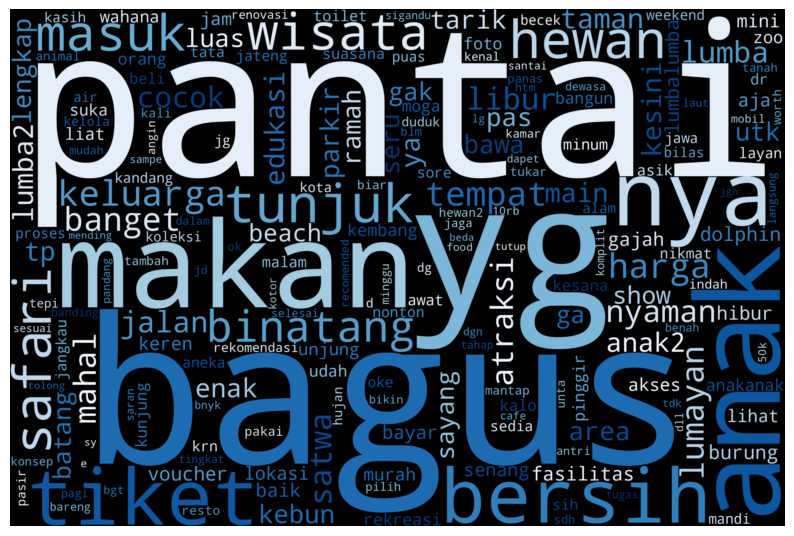

In [68]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk memplot wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))  # Atur ukuran plot
    plt.imshow(wordcloud, interpolation='bilinear')  # Tampilkan wordcloud
    plt.axis('off')  # Hilangkan sumbu

    # Simpan plot ke file
    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')  # Simpan dengan nama file

    plt.show()  # Tampilkan plot

# # Filter data untuk hanya menyertakan tweet positif
# netral_tweets = my_df[my_df['Label'] == 'None']

# # Gabungkan semua kata dalam kolom 'full_text' dari tweet positif menjadi satu string
# netral_words = ' '.join([tweets for tweets in netral_tweets['content']])

# Gabungkan semua kata dalam kolom 'full_text' menjadi satu string
all_words = ' '.join([tweets for tweets in df['text_tokens_stemmed'].fillna('')])

# Buat wordcloud untuk kata-kata positif
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS  # Hindari kata umum yang ada di STOPWORDS
).generate(all_words)

# Plot wordcloud yang telah dibuat
plot_cloud(wordcloud)

## Wordcloud Klasifikasi Sentimen Positif NB

### 1. Naive Bayes

#### Menghitung Jumlah Baris Positif

In [69]:
df[df['Label NB Average'] == 'positif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,"Konsep taman safari dipinggir pantai jadi bisa ada 2 pilihan mau masuk kepantai saja atau liat kebun binatangnya, harus dipertimbangkan lagi tujuan anda kesini karena yang tiket taman safari dan hanya liat pantai beda ya,kalo pengen liat2 …",konsep taman safari pinggir pantai 2 pilih masuk pantai liat kebun binatang timbang tuju kesini tiket taman safari liat pantai beda yakalo ken liat2,positif,positif,positif,positif,positif
1,"Dophinnya bagus, cuman sayang fasilitas tidak sebanding dengan harga tiketnya, masih kena retribusi masuk sebelum ke area wisata, resto hanya ada 1 tempat kecil dan tidak tertata sistem pembeliannya (siapa cepat dapat), kasihan yg nunggu duluan yg bawa anak",dophinnya bagus cuman sayang fasilitas banding harga tiket kena retribusi masuk area wisata resto 1 tata sistem beli cepat kasihan yg nunggu duluan yg bawa anak,negatif,positif,positif,negatif,positif
2,"Senang bisa berkunjung ke safari beach batang... tapi kmrn pas ke sini pas masih ada pembangunan.. hewannya mgkn belum lengkap. Ada pertunjukan hewan2 juga di jam2 tertentu. Bisa naik gajah, unta. tp yg paling menarik pas atraksi lumba2 …",senang kunjung safari beach batang kmrn pas pas bangun hewan mgkn lengkap tunjuk hewan2 jam2 gajah unta tp yg tarik pas atraksi lumba2,positif,positif,positif,positif,positif
3,Tempat masih harus dibenahi,benah,positif,positif,positif,positif,positif
4,"Jelek, becek , g jls",jelek becek g jls,negatif,positif,positif,negatif,positif


In [70]:
len(df[df['Label NB Average'] == 'positif'])

891

#### Penerapan Wordcloud

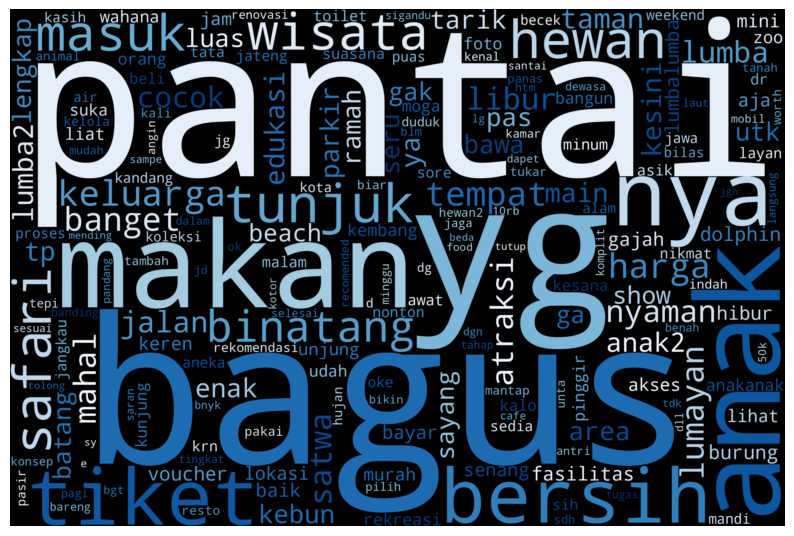

In [71]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')
    plt.show()

netral_tweets = df[df['Label NB Average'] == 'positif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])


wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

### 2. SVM

#### Menghitung Jumlah Baris Positif

In [72]:
df[df['Label SVM Average'] == 'positif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,"Konsep taman safari dipinggir pantai jadi bisa ada 2 pilihan mau masuk kepantai saja atau liat kebun binatangnya, harus dipertimbangkan lagi tujuan anda kesini karena yang tiket taman safari dan hanya liat pantai beda ya,kalo pengen liat2 …",konsep taman safari pinggir pantai 2 pilih masuk pantai liat kebun binatang timbang tuju kesini tiket taman safari liat pantai beda yakalo ken liat2,positif,positif,positif,positif,positif
1,"Dophinnya bagus, cuman sayang fasilitas tidak sebanding dengan harga tiketnya, masih kena retribusi masuk sebelum ke area wisata, resto hanya ada 1 tempat kecil dan tidak tertata sistem pembeliannya (siapa cepat dapat), kasihan yg nunggu duluan yg bawa anak",dophinnya bagus cuman sayang fasilitas banding harga tiket kena retribusi masuk area wisata resto 1 tata sistem beli cepat kasihan yg nunggu duluan yg bawa anak,negatif,positif,positif,negatif,positif
2,"Senang bisa berkunjung ke safari beach batang... tapi kmrn pas ke sini pas masih ada pembangunan.. hewannya mgkn belum lengkap. Ada pertunjukan hewan2 juga di jam2 tertentu. Bisa naik gajah, unta. tp yg paling menarik pas atraksi lumba2 …",senang kunjung safari beach batang kmrn pas pas bangun hewan mgkn lengkap tunjuk hewan2 jam2 gajah unta tp yg tarik pas atraksi lumba2,positif,positif,positif,positif,positif
3,Tempat masih harus dibenahi,benah,positif,positif,positif,positif,positif
4,"Jelek, becek , g jls",jelek becek g jls,negatif,positif,positif,negatif,positif


In [73]:
len(df[df['Label SVM Average'] == 'positif'])

884

#### Penerapan Wordcloud

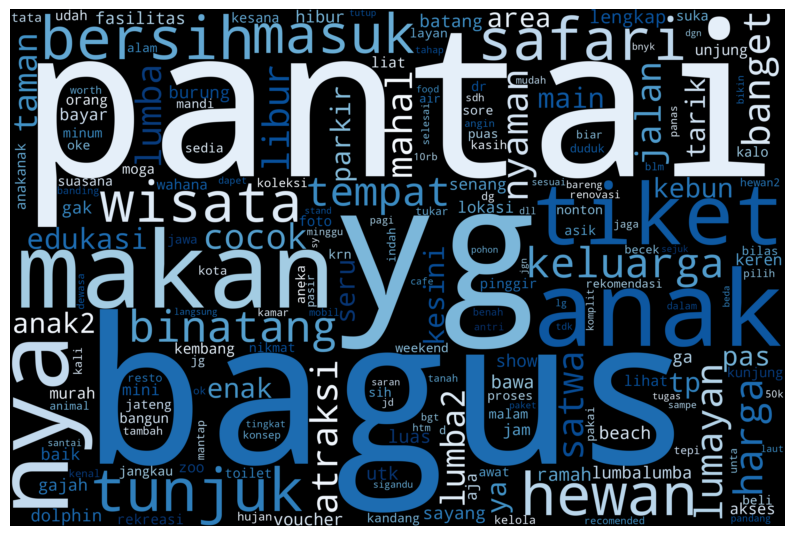

In [74]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')


    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label SVM Average'] == 'positif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

## Wordcloud Klasifikasi Sentimen Negatif

### 1. Naive Bayes

#### Menghitung Jumlah Baris Negatif

In [75]:
df[df['Label NB Average'] == 'negatif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average


In [76]:
len(df[df['Label NB Average'] == 'negatif'])

0

In [77]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label NB Average'] == 'negatif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

ValueError: We need at least 1 word to plot a word cloud, got 0.

### 2. SVM

#### Menghitung Jumlah Baris Negatif

In [79]:
df[df['Label SVM Average'] == 'negatif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
25,Coba aja pasti menyesal,coba aja sesal,negatif,positif,positif,negatif,negatif
257,"Kecewa banget.. acara piknik dari sekolahan.. gak ada pemandu nya. padahal ada 2 pemandu.. tpi malah gak terkondisikan dgn baik.. lihat lumba"" aja desak""an. jalur masuk untuk keluar dan masuk, jalur keluar juga untuk keluar dan masuk. udah …",kecewa banget acara piknik sekolah gak pandu nya 2 pandu tpi gak kondisi dgn lihat lumba aja desa jalur masuk masuk jalur masuk udah,negatif,positif,positif,negatif,negatif
338,"Harga makanannya gak masuk akal ,terlalu mahal.\r\nKalau memang tidak boleh bawa makanan dari luar setidaknya harga makanannya masuk akal dikit lah. …",harga makan gak masuk akal mahalkalau bawa makan harga makan masuk akal dikit,negatif,positif,positif,negatif,negatif
357,ES TEH NYA BASI. JALANAN DI AREA SANGAT BURUK KARENA TANAH BECEK. JADI BIKIN KOTOR. RUANGAN IBU MENYUSUI TIDAK TERAWAT. SAYANG BANGET PADAHAL SATWANYA LUMAYAN BANYAK. PELAYANAN CUKUP. TEMPAT BERTEDUH SEDIKIT.,es teh nya basi jalan area buruk tanah becek bikin kotor ruang susu awat sayang banget satwa lumayan layan teduh,negatif,positif,positif,negatif,negatif
429,Bisa dicoba sendiri.,coba,negatif,positif,positif,negatif,negatif


In [80]:
len(df[df['Label SVM Average'] == 'negatif'])

7

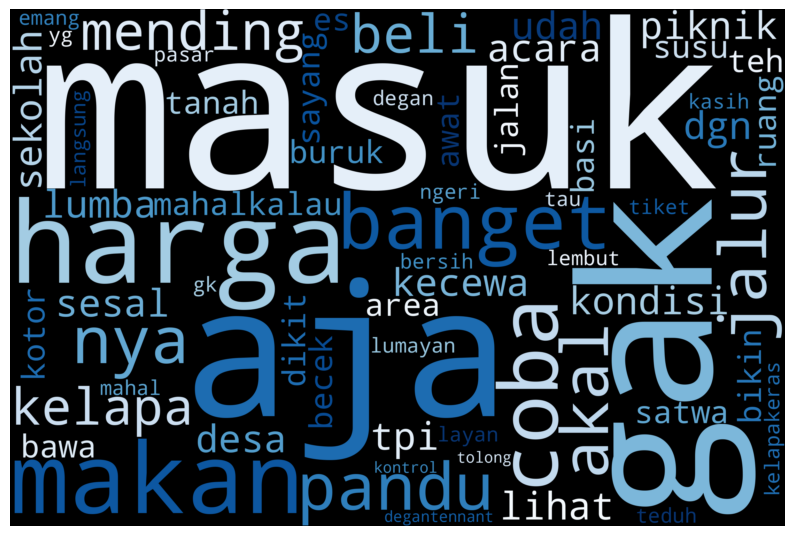

In [78]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label SVM Average'] == 'negatif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)